### Autorki rozwiązania: Agnieszka Prudło i Aleksandra Krzemińska

# Podział pracy
Obie zrobiłyśmy wszystkie zadania, a następnie przedyskutowałyśmy rozwiązania i wybrałyśmy najbardziej dokładne i czytelne wersje.

### 1. Wczytanie i czyszczenie danych


In [1]:
import data_loader
import visualizations
import average_and_limits

In [2]:
# id archiwum dla poszczególnych lat  
years = [2015,2018,2021,2024] 
gios_url_ids = {2015: '236', 2018: '603', 2021: "486", 2024: '582'}
gios_pm25_file = {2015: '2015_PM25_1g.xlsx', 2018: '2018_PM25_1g.xlsx', 2021: '2021_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

data = data_loader.download_multiple_gios_archives(years, gios_url_ids, gios_pm25_file)

In [3]:
# usuwanie niepotrzebnych wierszy
# ujednolicanie struktury danych

data_edited = data_loader.edit_df(data)

In [4]:
# pobieranie metadanych stacji pomiarowych

# url metadanych
gios_metadata_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/622"
gios_metadata = data_loader.download_gios_metadata(gios_metadata_url)

In [5]:
# mapowanie starych kodów stacji na nowe

data_edited = data_loader.create_code_map(gios_metadata, data_edited)

In [6]:
# tworzymy MultiIndex

data_multiindex = data_loader.multiindex_code_city(data_edited, gios_metadata)

In [7]:
# korekta indeksu daty i godziny (przesunięcie rekordów o 00:00:00 na poprzedni dzień)

data_multiindex_corrected = data_loader.correct_datetime_index(data_multiindex)

In [8]:
# scalenie danych z poszczególnych lat, zapis do pliku CSV i kontrola poprawności
df_all = data_loader.save_combined_data(data_multiindex_corrected, "poziom_zanieczyszczeń.csv")

# sprawdzenie wyglądu scalonych danych
df_all.head()

Miejscowość         Jelenia Góra      Wrocław                 Bydgoszcz  \
Kod stacji          DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna   
2015-01-01 01:00:00      151.112         78.0      50.0000         29.2   
2015-01-01 02:00:00      262.566         42.0      33.8244         27.1   
2015-01-01 03:00:00      222.830         27.0      28.7215          7.9   
2015-01-01 04:00:00      210.767         24.0      20.6891          7.1   
2015-01-01 05:00:00      191.211         22.0      22.5335          9.2   

Miejscowość                            Lublin         Łódź       Zgierz  \
Kod stacji          KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
2015-01-01 01:00:00         95.5      71.1012        59.73    58.690689   
2015-01-01 02:00:00         86.1      95.2582       185.92    44.501255   
2015-01-01 03:00:00         23.8      49.5078        54.25    24.163937   
2015-01-01 04:00:00         15.9      60.8468        50.15    19.516039   
2015-01-01 05:00:00         15.0      49.3106        39.17    16.850332   

Miejscowość         Zielona Góra       Kraków  ...    Białystok     Przemyśl  \
Kod stacji          LuZielKrotka MpKrakAlKras  ... PdBialUpalna PkPrzemGrunw   
2015-01-01 01:00:00          NaN         73.0  ...         67.0      18.9027   
2015-01-01 02:00:00      51.8628         55.0  ...        103.0      15.9257   
2015-01-01 03:00:00      15.8660         61.0  ...         49.0      16.1709   
2015-01-01 04:00:00      20.1187         62.0  ...         37.0      16.0252   
2015-01-01 05:00:00      27.3413         57.0  ...         27.0      15.5498   

Miejscowość               Gdańsk  Kościerzyna     Katowice  Złoty Potok  \
Kod stacji          PmGdaLeczkow PmKosTargowa SlKatoKossut SlZlotPotLes   
2015-01-01 01:00:00          NaN          NaN       51.389      49.9464   
2015-01-01 02:00:00     75.52780          NaN       37.709      45.6291   
2015-01-01 03:00:00      8.87389          NaN       41.984      49.2093   
2015-01-01 04:00:00      8.83194      22.7895       45.404      53.3160   
2015-01-01 05:00:00      6.56750          NaN       36.854      51.5259   

Miejscowość              Olsztyn       Kalisz     Szczecin               
Kod stacji          WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud  
2015-01-01 01:00:00    44.060833         25.5          NaN          NaN  
2015-01-01 02:00:00    49.943329         32.5      81.8501     215.3790  
2015-01-01 03:00:00    20.688448         24.3      25.7333      27.7458  
2015-01-01 04:00:00    17.437717         24.4      18.6240      26.5201  
2015-01-01 05:00:00    15.532262         25.0      17.6545      31.0393  

[5 rows x 30 columns]

### 2. Średnie miesięczne + trend dla miast

In [9]:
# obliczanie średnich miesięcznych dla każdego roku i stacji

monthly_df = average_and_limits.monthly_mean(df_all)
monthly_df

Miejscowość  Jelenia Góra      Wrocław                 Bydgoszcz               \
Kod stacji   DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna KpBydWarszaw   
rok  miesiąc                                                                    
2015 1          24.504821    32.921321    27.863459    21.016268    25.890511   
     2          41.859821    45.884722    42.238897    45.497710    49.939606   
     3          28.603600    35.995391    32.581978    33.105139    24.413016   
     4          12.323373    19.873433    15.131175    16.357370          NaN   
     5           8.716385    18.487889    13.339719    12.793215    12.668022   
     6           7.791419    18.227356    11.718465     9.976331     9.767814   
     7           6.879472    18.914791    12.158851    10.189889     9.693838   
     8          11.131890    25.153938    18.316188    14.717009    13.796165   
     9           7.141748    19.981177    12.324672    14.417414    14.056662   
     10         23.644826    43.910344    32.489062    35.277361    35.401508   
     11         25.710537    49.637270    43.717427    30.462654    35.870557   
     12         22.893786    34.432793    27.114146    21.933659    30.398732   
2018 1          21.121368    25.598823    25.810687    35.005226    38.350731   
     2          38.070286    45.710670    46.228103    51.506631    48.145126   
     3          35.997834    38.456314    37.214785    45.066158    56.718008   
     4          13.830232    20.700946    18.597148    23.143182    23.061890   
     5          16.161816    16.648540    13.897815    14.156190    15.869706   
     6          13.660109    12.446891    11.547937    12.679838    13.462054   
     7          12.584755    12.095556    10.648858    15.579521    15.000154   
     8          10.960227    12.919487    11.245645    15.657619    16.765751   
     9          14.683143    14.760631    12.584673    16.402166    15.397947   
     10         22.092889    23.661113    21.446295    29.950907    29.287297   
     11         38.153154    34.874046    33.884764    43.474770    43.248240   
     12         19.222373    23.230754    23.156903    27.937650    30.860461   
2021 1          29.901718    29.350533    26.805180    29.057314    22.569471   
     2          34.237084    37.239144    33.639402    41.737349    35.387199   
     3          26.880032    26.893210    23.261149    21.834110    17.558663   
     4          16.038263    16.848903    14.380061    13.227994    11.464154   
     5           8.564051    11.310791     8.337058     5.459014     7.917876   
     6          12.918083    16.228332    12.795795     6.943228     9.429378   
     7          10.734240    13.914004    11.201217    10.412534    10.864631   
     8           8.095207    11.171375     8.401480     5.696176     7.922703   
     9          12.849123    16.687761    12.654480     8.778571    10.094299   
     10         19.165852    19.799261    16.197655    14.645270    15.820652   
     11         26.115729    25.541943    23.671301    16.429630    17.225452   
     12         35.768634    29.465271    28.076707    23.367275    23.207163   
2024 1          23.274866    24.596505    20.246909    17.465593    19.892946   
     2          13.506178    16.553401    14.030460    14.689098    16.090374   
     3          19.934320    24.241184    21.038172    23.096828    23.358587   
     4           9.886528    11.894437     9.803616    11.310778    10.433705   
     5           8.234677    11.041256     9.184274    10.873099     9.573634   
     6           9.513333    10.509471     9.429624     8.961730     9.074722   
     7           7.453763     9.097690     8.482930     7.758732     7.722911   
     8           9.372581    11.574059    13.286649     9.209726     9.179772   
     9          11.491155    13.114571    15.856825    12.913372    13.917500   
     10         13.677898    15.125575    17.468817    13.104191    17.466622   
     11         20.962500    20

In [10]:
# grupowanie po miastach oraz liczenie średiej dla miast 
monthly_df_grouped = monthly_df.groupby(level=0, axis=1).mean()
monthly_df_grouped

C:\Users\agnie\AppData\Local\Temp\ipykernel_7272\1023808079.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_df_grouped = monthly_df.groupby(level=0, axis=1).mean()


Miejscowość   Białystok  Bydgoszcz     Gdańsk  Jelenia Góra     Kalisz  \
rok  miesiąc                                                             
2015 1        22.464238  23.453389  15.251184     24.504821  32.039886   
     2        41.037325  47.718658  21.435362     41.859821  48.900846   
     3        30.945504  28.759077  17.027339     28.603600  41.674071   
     4        13.426136  16.357370  10.397704     12.323373  24.054884   
     5        10.741935  12.730619   8.397277      8.716385  19.572950   
     6         9.250729   9.872072   7.627350      7.791419  15.819560   
     7         8.619519   9.941863   7.988024      6.879472  15.889289   
     8        13.242637  14.256587  10.970232     11.131890  22.185033   
     9        14.042398  14.237038   9.395071      7.141748  17.613177   
     10       26.063380  35.339435  19.428102     23.644826  42.418469   
     11       22.105183  33.166606  13.127917     25.710537  41.132756   
     12       25.110811  26.166196  14.048379     22.893786  26.462317   
2018 1        22.597561  36.677978  17.621009     21.121368        NaN   
     2        29.943338  49.825878  22.167424     38.070286  49.754550   
     3        27.932432  50.892083  21.560030     35.997834  38.322789   
     4        14.994382  23.102536  16.940262     13.830232  20.145286   
     5         9.679296  15.012948  13.629763     16.161816  14.492683   
     6         8.476923  13.070946  12.167722     13.660109  12.358969   
     7         8.120112  15.289838  12.130108     12.584755  13.271408   
     8         8.338776  16.211685  12.645684     10.960227  13.698406   
     9         9.924370  15.900057  12.095362     14.683143  16.010000   
     10       19.282638  29.619102  18.398238     22.092889  24.261947   
     11       22.162921  43.361505  23.418709     38.153154  36.470207   
     12       18.601615  29.399056  14.563713     19.222373  23.144764   
2021 1        27.469003  25.813392  26.423242     29.901718  30.169934   
     2        31.066265  38.562274  34.452908     34.237084  40.491779   
     3        17.737550  19.696386  20.398686     26.880032  29.237250   
     4        13.555866  12.346074  14.588983     16.038263  19.031608   
     5         9.172043   6.688445  10.837720      8.564051   9.912900   
     6        10.835926   8.186303  12.157522     12.918083  13.436213   
     7        11.773700  10.638583  12.578711     10.734240  14.387558   
     8         8.046259   6.809439   8.882545      8.095207  11.490622   
     9         9.687065   9.436435  11.963975     12.849123  14.973283   
     10       16.687237  15.232961  17.760616     19.165852  20.810373   
     11       18.781944  16.827541  17.257728     26.115729  28.850152   
     12       17.814614  23.287219  20.018332     35.768634  39.478690   
2024 1        15.414013  18.679270  16.550539     23.274866  24.507392   
     2        11.007310  15.389736  15.185036     13.506178  18.619253   
     3        17.306864  23.227708  22.579217     19.934320  28.021131   
     4        10.525000  10.872242  15.131198      9.886528  13.471250   
     5        10.610215  10.223366  14.450538      8.234677  12.682661   
     6        10.507463   9.018226  12.335188      9.513333  12.278333   
     7         8.052414   7.740822   9.763795      7.453763  10.261725   
     8        10.822191   9.194749  11.628857      9.372581  12.873387   
     9        13.641168  13.415436  16.022270     11.491155  17.357799   
     10       12.582111  15.285406  14.074832     13.677898  19.584005   
     11       14.239888  17.273490  13.743611     20.962500  21.465132   
     12       13.630972  16.298726  13.868102     24.602957  27.353763   

Miejscowość    Katowice  Kościerzyna     Kraków  Kędzierzyn-Koźle  Legionowo  \
rok  miesiąc                                                                   
2015 1        31.247839    36.803262  41.628128         31.394930  34.321645   
     2        56.355432    51.354948  66.885357         57.

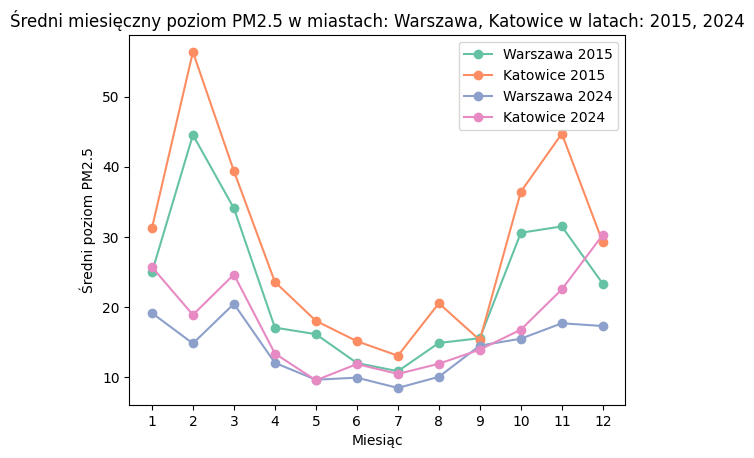

In [11]:
# wykres porównujący średnie miesięczne poziomy PM2.5 w Warszawie i Katowicach w 2014 i 2024 roku

visualizations.plot_average(monthly_df_grouped, [2015, 2024], ['Warszawa', 'Katowice'])

### 3. Heatmapa miesięcznych średnich

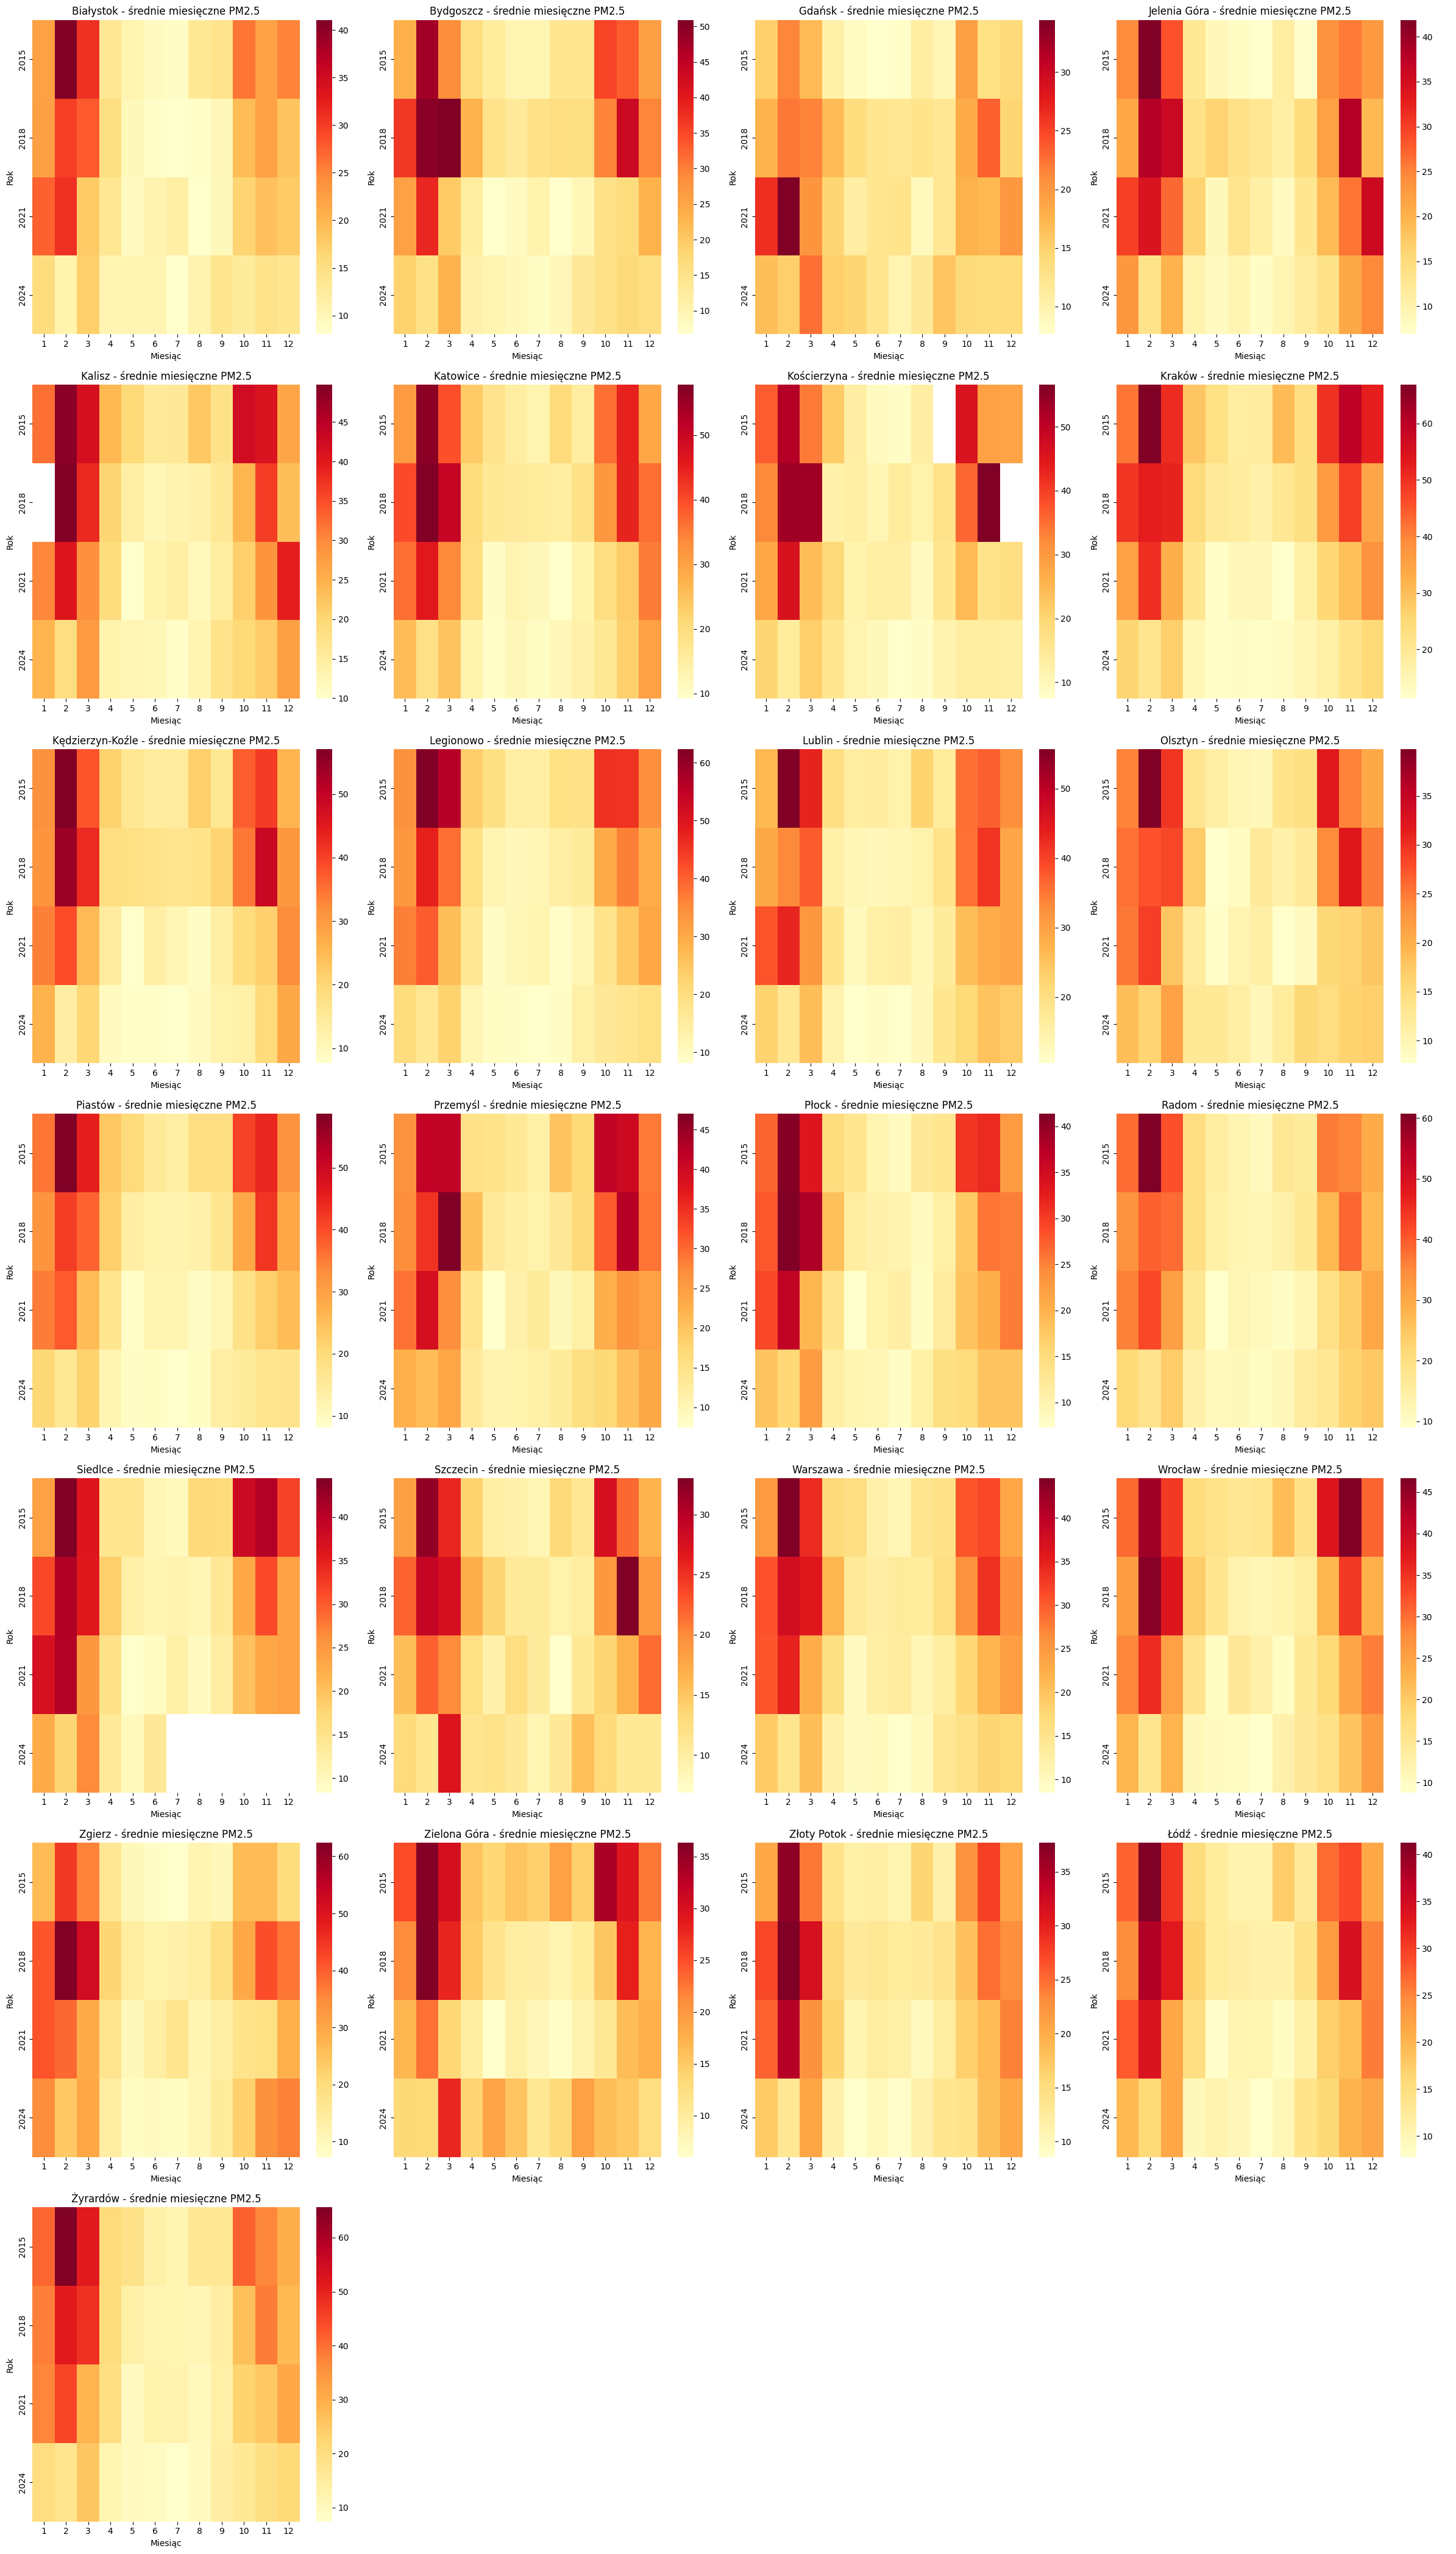

In [12]:
visualizations.heatmaps(monthly_df_grouped)

### 4. Dni z przekroczeniem normy (WHO)

In [13]:
norms_df = average_and_limits.find_above_norm(df_all, years=years, sort_by=2024, norm=15)
norms_df

,,2015,2018,2021,2024
Miejscowość,Kod stacji,,,,
Szczecin,ZpSzczAndrze,113,106,95,72
Białystok,PdBialUpalna,158,135,137,76
Siedlce,MzSiedKonars,229,205,177,79
Kościerzyna,PmKosTargowa,177,143,169,102
Warszawa,MzWarWokalna,210,226,151,102
Bydgoszcz,KpBydPlPozna,187,239,125,108
Jelenia Góra,DsJelGorOgin,144,198,162,109
Kędzierzyn-Koźle,OpKKozBSmial,265,281,178,111
Złoty Potok,SlZlotPotLes,173,192,179,117


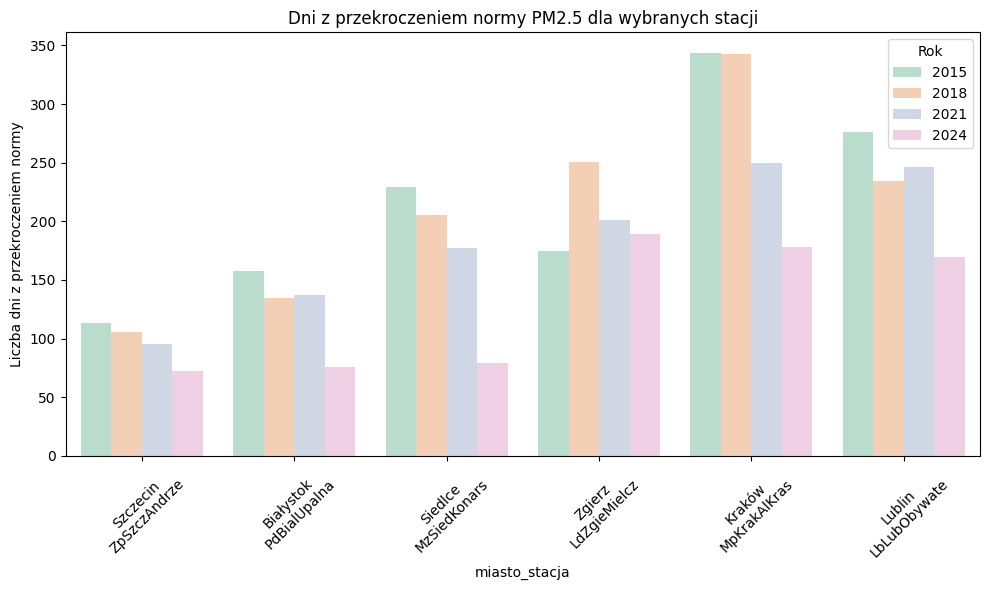

In [14]:
visualizations.bar_plots(norms_df, year=2024)